In [ ]:
#import packages and verify versions

# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)


numpy: 1.21.5
scipy: 1.4.1
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


# Case Study : Higgs Bosson Challenge 


The challenge data is now available on http://opendata.cern.ch/collection/ATLAS-Higgs-Challenge-2014. The case study is to classify the events into signals and background, any other event other than the signal. This is a binary classification problem. Instead of the entire data set, we have used a sample data set which has training data size of 10000 and a separate testing data of size 5000 with labels on which models will be evaluated. We will also assume the best model is selected based on the classification accuracy achieved on the test data, with metrics of accuracy, as the data is well balanced between the two classes.

In [ ]:
!wget -q https://raw.githubusercontent.com/SpringerNLP/Chapter2/master/data/higgs_test_5k.csv
!wget -q https://raw.githubusercontent.com/SpringerNLP/Chapter2/master/data/higgs_train_10k.csv

# 1. Loading Training and Testing CSV files using Pandas

In [ ]:
#for google colab 
from pandas import read_csv
train_file = 'higgs_train_10k.csv'
test_file = 'higgs_test_5k.csv'
names = [
    'response',
    'x1',
    'x2',
    'x3',
    'x4',
    'x5',
    'x6',
    'x7',
    'x8',
    'x9',
    'x10',
    'x11',
    'x12',
    'x13',
    'x14',
    'x15',
    'x16',
    'x17',
    'x18',
    'x19',
    'x20',
    'x21',
    'x22',
    'x23',
    'x24',
    'x25',
    'x26',
    'x27',
    'x28']
train_data = read_csv(train_file, names=names)
test_data = read_csv(test_file, names=names)
print(train_data.shape)
print(test_data.shape)


(10000, 29)
(5000, 29)


# 2. Exploratory Data Analysis

In [ ]:
# give the peek into the dataset
train_data.head(20)

,response,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
0,1.0,0.869,-0.635,0.22600,0.327,-0.6900,0.754,-0.2490,-1.0900,0.00,...,-0.0105,-0.045800,3.1,1.350,0.980,0.978,0.920,0.722,0.989,0.877
1,1.0,0.908,0.329,0.35900,1.500,-0.3130,1.100,-0.5580,-1.5900,2.17,...,-1.1400,-0.000819,0.0,0.302,0.833,0.986,0.978,0.780,0.992,0.798
2,1.0,0.799,1.470,-1.64000,0.454,0.4260,1.100,1.2800,1.3800,0.00,...,1.1300,0.900000,0.0,0.910,1.110,0.986,0.951,0.803,0.866,0.780
3,0.0,1.340,-0.877,0.93600,1.990,0.8820,1.790,-1.6500,-0.9420,0.00,...,-0.6780,-1.360000,0.0,0.947,1.030,0.999,0.728,0.869,1.030,0.958
4,1.0,1.110,0.321,1.52000,0.883,-1.2100,0.681,-1.0700,-0.9220,0.00,...,-0.3740,0.113000,0.0,0.756,1.360,0.987,0.838,1.130,0.872,0.808
5,0.0,1.600,-0.608,0.00707,1.820,-0.1120,0.848,-0.5660,1.5800,2.17,...,-0.6540,-1.270000,3.1,0.824,0.938,0.972,0.789,0.431,0.961,0.958
6,1.0,0.409,-1.880,-1.03000,1.670,-1.6000,1.340,0.0554,0.0135,2.17,...,0.0695,1.380000,3.1,0.869,1.220,1.000,0.545,0.699,0.977,0.829
7,1.0,0.934,0.629,0.52800,0.238,-0.9670,0.548,-0.0594,-1.7100,2.17,...,1.2900,-1.470000,0.0,0.902,1.080,0.980,0.783,0.849,0.894,0.775
8,1.0,1.410,0.537,0.69000,1.180,-0.1100,3.200,-1.5300,-1.5800,0.00,...,-0.1510,1.160000,0.0,1.670,4.040,1.180,1.050,1.540,3.530,2.740
9,1.0,1.180,0.104,1.40000,0.480,0.2660,1.140,1.5300,-0.2530,0.00,...,0.2690,0.530000,0.0,0.833,0.774,0.986,1.100,0.849,0.937,0.812


In [ ]:
# datatype of each feataure
types = train_data.dtypes
print(types)

response    float64
x1          float64
x2          float64
x3          float64
x4          float64
x5          float64
x6          float64
x7          float64
x8          float64
x9          float64
x10         float64
x11         float64
x12         float64
x13         float64
x14         float64
x15         float64
x16         float64
x17         float64
x18         float64
x19         float64
x20         float64
x21         float64
x22         float64
x23         float64
x24         float64
x25         float64
x26         float64
x27         float64
x28         float64
dtype: object


In [ ]:
#base statistics for data
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 5)
description = train_data.describe()
display(description)

,response,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,...,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,0.52950,0.99794,-0.01666,-0.00347,0.99140,-0.00980,0.99203,-0.00148,0.00375,1.00402,...,0.00125,-0.01481,0.99851,1.02914,1.02142,1.05084,1.01251,0.96770,1.03122,0.95787
std,0.49915,0.57498,1.00302,1.01083,0.59549,1.00477,0.47739,1.00408,1.01590,1.02555,...,1.00542,1.00101,1.39611,0.63723,0.36961,0.16594,0.40492,0.52318,0.36620,0.31336
min,0.00000,0.27500,-2.43000,-1.74000,0.01240,-1.74000,0.15900,-2.94000,-1.74000,0.00000,...,-2.50000,-1.74000,0.00000,0.17200,0.34200,0.46100,0.38400,0.08100,0.38900,0.44500
25%,0.00000,0.59600,-0.74400,-0.87200,0.57100,-0.88600,0.68000,-0.68250,-0.89225,0.00000,...,-0.70800,-0.88500,0.00000,0.79000,0.84700,0.98600,0.76800,0.67500,0.82300,0.77100
50%,1.00000,0.85900,-0.02880,0.00064,0.88600,-0.01995,0.89750,-0.00993,0.02040,1.09000,...,-0.00129,-0.01410,0.00000,0.89500,0.94900,0.99000,0.91700,0.86900,0.94550,0.87150
75%,1.00000,1.25000,0.71500,0.88200,1.29000,0.85700,1.17000,0.68000,0.87900,2.17000,...,0.72000,0.84700,3.10000,1.02000,1.08000,1.02000,1.15000,1.12000,1.13000,1.06000
max,1.00000,6.70000,2.43000,1.74000,5.82000,1.74000,7.06000,2.97000,1.74000,2.17000,...,2.50000,1.74000,3.10000,13.10000,7.39000,3.68000,6.58000,8.26000,4.75000,4.32000


In [ ]:
# class distribution for train and test
train_data_class = train_data.groupby('response').size()
print("train data class distribution")
print(train_data_class)

test_data_class = test_data.groupby('response').size()
print("\ntest data class distribution")
print(test_data_class)

train data class distribution
response
0.0    4705
1.0    5295
dtype: int64

test data class distribution
response
0    2315
1    2685
dtype: int64


In [ ]:
# pearsons correlation to understand feature independence
correlations = train_data.corr(method='pearson')
display(correlations)

,response,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
response,1.00000,-0.04341,-0.01785,0.00383,-0.09870,-9.92601e-03,0.06545,0.00202,-0.00466,-0.02024,...,0.00740,-0.00442,0.02201,0.00450,0.01726,0.00681,-0.02773,-1.53600e-01,-0.06361,-0.12084
x1,-0.04341,1.00000,-0.00200,-0.00684,-0.14662,-7.27591e-03,0.17019,-0.00862,-0.00380,-0.00040,...,0.00513,0.00411,0.00532,0.03081,0.02668,0.27440,0.10003,-5.23772e-03,0.09333,0.14165
x2,-0.01785,-0.00200,1.00000,-0.00103,-0.00454,1.02144e-02,-0.01699,0.27630,-0.00025,-0.01056,...,0.16942,0.00104,0.00658,-0.00419,-0.00377,-0.00167,-0.01554,-4.52646e-03,-0.01731,-0.01066
x3,0.00383,-0.00684,-0.00103,1.00000,-0.00350,-5.61581e-02,-0.00567,0.01561,-0.16534,-0.01105,...,0.00238,-0.07487,-0.00757,0.01669,0.01368,-0.01186,0.00204,-3.83245e-03,-0.00301,0.00602
x4,-0.09870,-0.14662,-0.00454,-0.00350,1.00000,8.70675e-03,0.20092,-0.01062,-0.00384,-0.01892,...,0.01196,-0.00368,0.00977,0.04562,0.04361,0.17634,0.28548,5.67451e-02,0.22681,0.31308
x5,-0.00993,-0.00728,0.01021,-0.05616,0.00871,1.00000e+00,-0.00663,-0.00079,-0.15644,-0.00732,...,-0.00583,-0.03753,0.00057,-0.00283,0.00080,0.00104,-0.00836,-5.96270e-06,0.00130,-0.00011
x6,0.06545,0.17019,-0.01699,-0.00567,0.20092,-6.62733e-03,1.00000,-0.01044,-0.00944,-0.01390,...,-0.01140,0.00676,-0.00343,0.17054,0.25106,0.04071,0.28716,3.43032e-01,0.47440,0.44176
x7,0.00202,-0.00862,0.27630,0.01561,-0.01062,-7.87953e-04,-0.01044,1.00000,-0.00855,-0.00398,...,0.17951,-0.00100,-0.00666,-0.00500,-0.00763,-0.00312,-0.00668,1.77150e-03,-0.01075,-0.01375
x8,-0.00466,-0.00380,-0.00025,-0.16534,-0.00384,-1.56438e-01,-0.00944,-0.00855,1.00000,-0.01194,...,-0.00498,-0.11531,-0.00219,-0.00332,-0.01370,0.01247,-0.01188,-5.74688e-03,-0.01700,-0.01147
x9,-0.02024,-0.00040,-0.01056,-0.01105,-0.01892,-7.31785e-03,-0.01390,-0.00398,-0.01194,1.00000,...,0.00126,0.00392,-0.24131,-0.11485,-0.06610,0.00482,0.13391,2.82755e-01,0.10902,0.00935


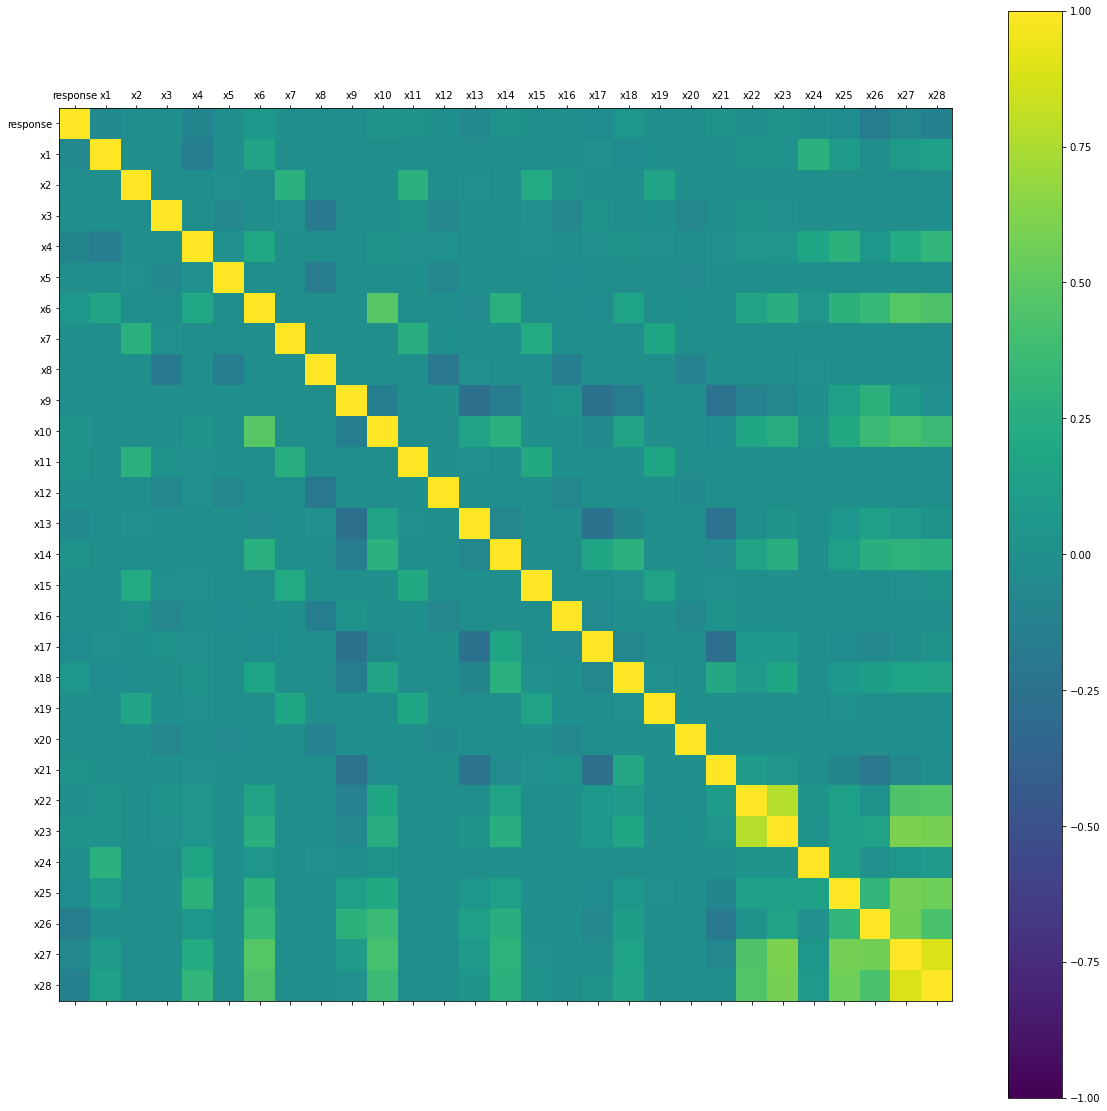

In [ ]:
# visualization of correlations
import matplotlib.pyplot as pyplot
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,29,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.rcParams['figure.figsize'] = (15,15)
pyplot.show()

train data histograms


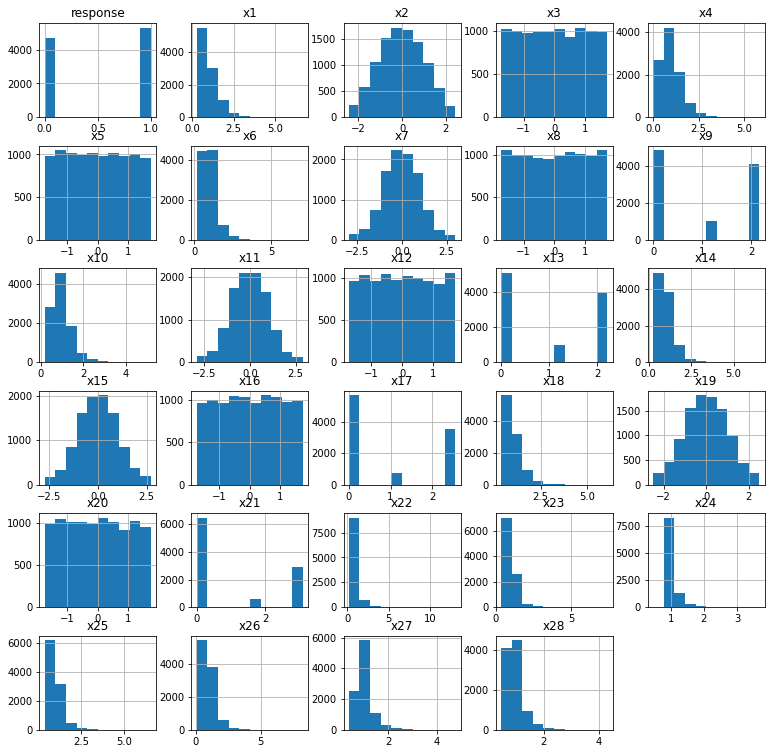

test data histograms


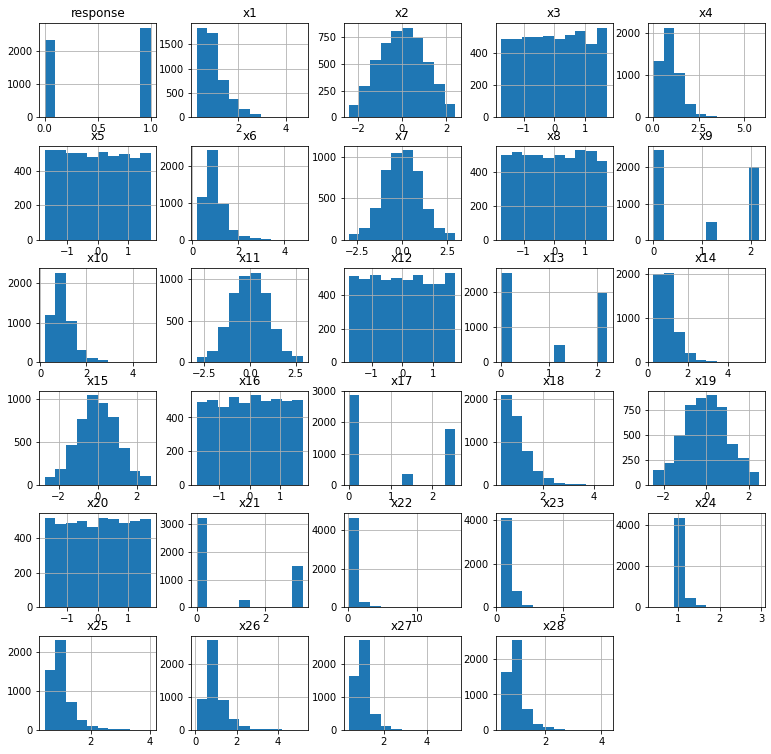

In [ ]:
# visualization using pyplot and histograms of training and testing data
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (13,13)

print("train data histograms")
train_data.hist()
pyplot.show()

print("test data histograms")
pyplot.rcParams['figure.figsize'] = (13,13)
test_data.hist()
pyplot.show()

test data histograms


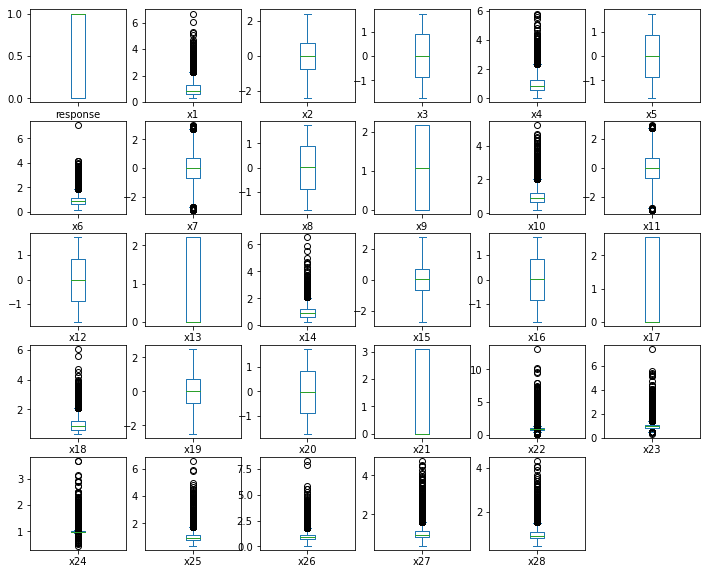

test data histograms


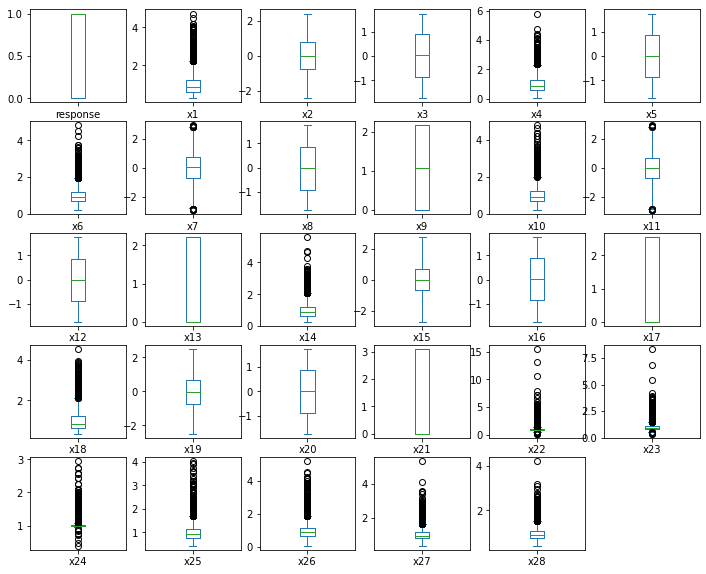

In [ ]:
# boxplot visualization of train and test data
print("test data histograms")
pyplot.rcParams['figure.figsize'] = (12,12)
train_data.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
pyplot.show()

print("test data histograms")
pyplot.rcParams['figure.figsize'] = (12,12)
test_data.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
pyplot.show()

# 3. Train and Test Data as Vector/Matrix Representation for Modeling

In [ ]:
# train data
train_array = train_data.values
# separate array into input and output variables. The first column is the dependent variable
X_train = train_array[:,1:28]
y_train = train_array[:,0]
# test data
test_array = test_data.values
# separate array into input and output variables
X_test = test_array[:,1:28]
y_test = test_array[:,0]

## Manifold Visualization of Data

Isomap: 1.5e+02 sec


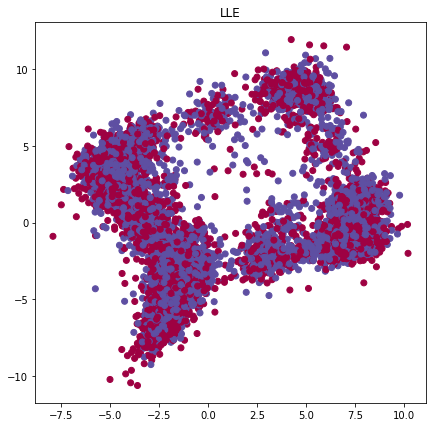

MDS: 2.4e+02 sec


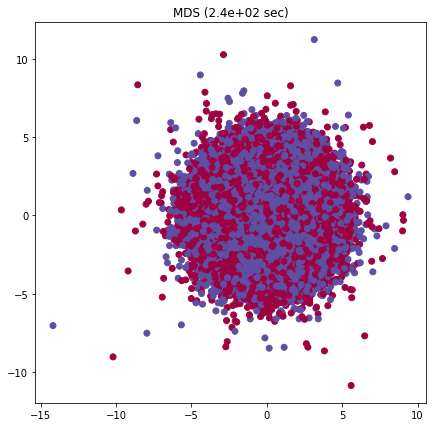

SpectralEmbedding: 93 sec


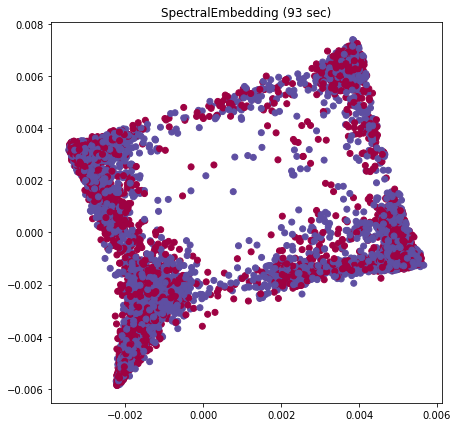

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


t-SNE: 1.3e+02 sec


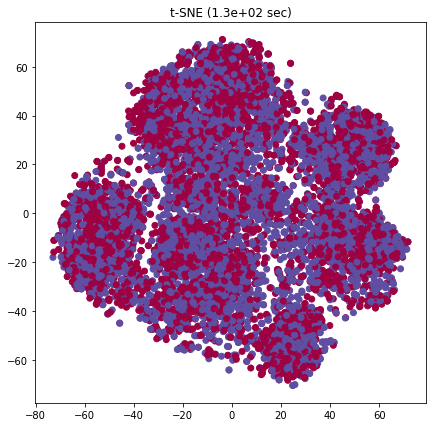

In [ ]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

n_neighbors = 10
n_components = 2
color=y_train

#used to run four times to show that isomap is nondeterministic
# for i, method in enumerate(methods):

i = 0
t0 = time()
Ytransformed = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X_train)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1],c=color, cmap=plt.cm.Spectral)
plt.title(labels[i])
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Ytransformed = mds.fit_transform(X_train)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1], c=color,cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Ytransformed = se.fit_transform(X_train)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1], c=color,cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Ytransformed = tsne.fit_transform(X_train)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1], c=color,cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

# 4. Feature Transformation using PCA

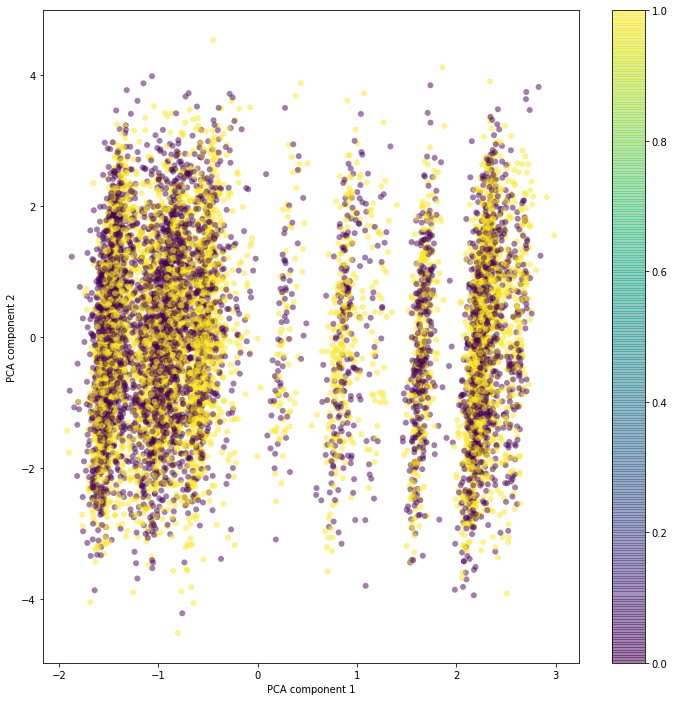

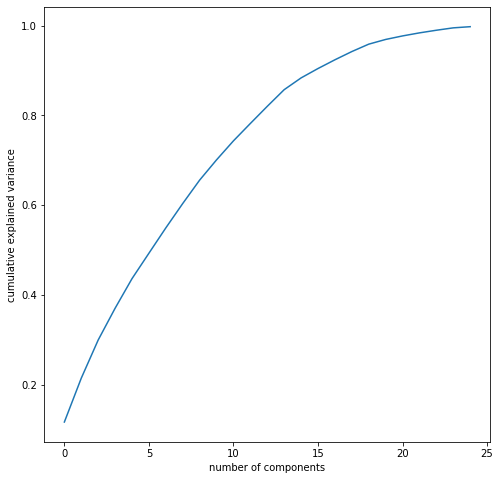

Explained Variance: [0.11675805 0.09773677 0.08504891 0.07073058 0.06598328 0.05667145
 0.05645659 0.05431017 0.05216481 0.0451427  0.04236952 0.03873282
 0.03818627 0.03710655 0.02624647 0.02087842 0.01946626 0.01833357
 0.01650435 0.01048494 0.00786502 0.00680588 0.00586647 0.00531584
 0.00259944]


In [ ]:
# Feature decomposition  with PCA
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X_train)
projected = pca.fit_transform(X_train)

pyplot.scatter(projected[:, 0], projected[:, 1],
               c=y_train, edgecolor='none', alpha=0.5)
pyplot.xlabel('PCA component 1')
pyplot.ylabel('PCA component 2')
pyplot.rcParams['figure.figsize'] = (8, 8)
pyplot.colorbar()
pyplot.show()
pca = PCA(n_components=25)
fit = pca.fit(X_train)
pyplot.plot(numpy.cumsum(fit.explained_variance_ratio_))
pyplot.xlabel('number of components')
pyplot.ylabel('cumulative explained variance')
pyplot.show()
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
# the top graph show PCA analysis. There is no clear cluster sepration for the two result classes.
# the bottom graph shows the number of dimensions to explained varaince

# 5. Feature Selection impact and scores on Training Data

In [ ]:
from sklearn import preprocessing
from sklearn.feature_selection import chi2

#scale before performing chi2 test
min_max_scaler = preprocessing.MinMaxScaler()
scaler = min_max_scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
chi2_score = chi2(X_train_scaled, y_train)[0]
features = [ 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27','x28']
fscores = zip(features, chi2_score)
wchi2 = sorted(fscores, key=lambda x: x[1], reverse=True) #sorted by scores

scores_labels = numpy.asarray(wchi2)
print("chi2 score-labels")
print(scores_labels)

label = [row[0] for row in scores_labels]
print("labels")
print(label)

score = [row[1] for row in scores_labels]
print("scores")
print(score)

y_pos = numpy.arange(len(score))
yrange = range(len(score))
print("range of the score-labels")
print(yrange)

chi2 score-labels
[['x26' '8.90346287406173']
 ['x13' '8.873767232814378']
 ['x4' '6.0745530786596005']
 ['x17' '5.020814821701416']
 ['x21' '3.0510676840250426']
 ['x9' '1.9768680369522516']
 ['x27' '1.9373519120568163']
 ['x18' '1.909799833010493']
 ['x6' '1.6978376560701287']
 ['x1' '1.3412511268408103']
 ['x10' '0.7150322189439381']
 ['x11' '0.3380142518419011']
 ['x25' '0.32381562342198966']
 ['x14' '0.3217357786256996']
 ['x2' '0.27317919170713356']
 ['x5' '0.16518358983682604']
 ['x23' '0.0850254388420135']
 ['x19' '0.04429125896575771']
 ['x8' '0.03693118126530916']
 ['x20' '0.03260105301887274']
 ['x3' '0.024821121895413342']
 ['x15' '0.012855629792167884']
 ['x12' '0.009810181623275838']
 ['x22' '0.0074272620516064244']
 ['x16' '0.006749348941104573']
 ['x24' '0.006720238048007796']
 ['x7' '0.0023612319542301126']]
labels
['x26', 'x13', 'x4', 'x17', 'x21', 'x9', 'x27', 'x18', 'x6', 'x1', 'x10', 'x11', 'x25', 'x14', 'x2', 'x5', 'x23', 'x19', 'x8', 'x20', 'x3', 'x15', 'x12', 'x

# 6. Model Creation, Tuning Hyperparameters and Validation using Train Data¶

In [ ]:
# perform grid search to find the best parameter for Logistic Regression,
# Perceptron, Naive Bayes, LDA algorithm
import numpy as np
from sklearn.model_selection import GridSearchCV #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.linear_model import LogisticRegression #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import Perceptron #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# using roc AUC as scoring
scoring = 'accuracy'

# Naive Bayes
naiveBayes = GaussianNB()
nbscore = cross_val_score(naiveBayes, X_train, y_train, cv=3, scoring=scoring)
print('Naive Bayes CV score =', np.mean(nbscore))


# creating parameter grid for LG.  
# penalty. https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
penalties = numpy.array(['l1', 'l2'])
# C for logistic regression. Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
c_values = numpy.array([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001])
# max iteration. Maximum number of iterations taken for the solvers to converge.
iters = numpy.array([100, 150])
LR_param_grid = {'penalty': penalties, 'C': c_values, 'max_iter': iters}

# logistic regression as algorithm
gridLogisticRegression = LogisticRegression(solver="liblinear") #this algorithm choice supposrt both L1 and L2 penalty term
# Using GridSearchCV on Training Data for LR. 
grid = GridSearchCV( 
    estimator=gridLogisticRegression,
    param_grid=LR_param_grid,
    scoring=scoring)
grid.fit(X_train, y_train)
print('LR Best CV Score ', grid.best_score_) #Mean cross-validated score of the best_estimator
#Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data
print('LR Best Penalty', grid.best_estimator_.penalty) #best Penalty
print('LR Best C', grid.best_estimator_.C) #best C
print('LR Best Max Iterations', grid.best_estimator_.max_iter) #best max interations


# Perceptron. 
# Using GridSearchCV on Training Data for perceptron
# alphas. Constant that multiplies the regularization term if regularization is used
alphas = numpy.array([0.001, 0.0001, 0.00001, 0.000001])
# iterations. The maximum number of passes over the training data (aka epochs).
pereptorn_param_grid = {'alpha': alphas, 'max_iter': iters}
grid = GridSearchCV(
    estimator=Perceptron(),
    param_grid=pereptorn_param_grid,
    scoring=scoring)
grid.fit(X_train, y_train)
print('Perceptron Best CV Score ', grid.best_score_)
print('Perceptron Best alpha', grid.best_estimator_.alpha) #best max alpha
print('Perceptron Best Max Iterations', grid.best_estimator_.max_iter)

# LDA. 
tols = numpy.array([0.001, 0.00001, 0.001]) #Absolute threshold for a singular value of X to be considered significant, used to estimate the rank of X. Dimensions whose singular values are non-significant are discarded.
lda_param_grid = {'tol': tols}
grid = GridSearchCV(
    estimator=LinearDiscriminantAnalysis(),
    param_grid=lda_param_grid,
    scoring=scoring)
grid.fit(X_train, y_train)
print('LDA Best CV Score ', grid.best_score_)
print('LDA Best tol', grid.best_estimator_.tol) #best tol


Naive Bayes CV score = 0.6020991721247709
LR CVScore  0.6099
LR Penalty l1
LR C 0.1
LR Max Iterations 100
Perceptron CVScore  0.5435
Perceptron alpha 0.001
Perceptron Max Iterations 100
LDA CVScore  0.6079
LDA tol 0.001


# 7. SVM Grid Search

In [ ]:
from sklearn.svm import SVC
import numpy
# gamma parameter in SVM. Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
gammas = numpy.array([1, 0.1, 0.01, 0.001])
# C for logistic regression. Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
c_values = numpy.array([100, 1, 0.1, 0.01])
svm_param_grid = {'gamma': gammas, 'C': c_values}
svm = SVC(kernel='rbf')
scoring = 'accuracy'
grid = GridSearchCV(estimator=svm, param_grid=svm_param_grid, scoring=scoring)
grid.fit(X_train, y_train)
print('SVM Score ', grid.best_score_)
print('SVM gamma ', grid.best_estimator_.gamma)
print('SVM CV Score ', grid.best_estimator_.C)


0.642
0.01
100.0


# 8. Pipeline with Feature Reduction Selection, Logistic Regression using Grid Search 

Automatically created module for IPython interactive environment


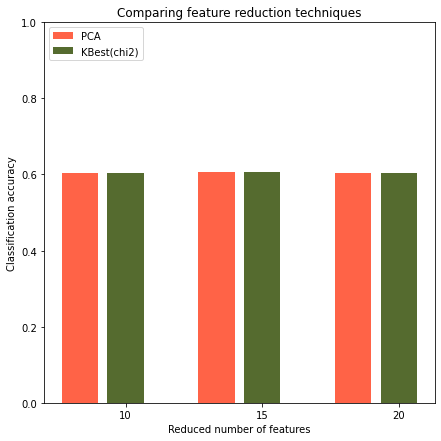

In [ ]:
# Modified the Code for changes
# Original Authors: Robert McGibbon, Joel Nothman, Guillaume Lemaitre
# PCA and kbest with chi-square as the feature selection. LR as the classifer

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing

# transform the features using MinMaxScaler as many are negatives
min_max_scaler = preprocessing.MinMaxScaler() #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = min_max_scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

print(__doc__) #documentation

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LogisticRegression(solver="liblinear"))
])

N_FEATURES_OPTIONS = [10, 15, 20]
C_OPTIONS = [0.001, 0.1, 1, 10, 100, 1000]
max_iter_OPTIONS = [100, 150]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=10)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS,
        'classify__max_iter':max_iter_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS,
        'classify__max_iter':max_iter_OPTIONS
    },
]
reducer_labels = ['PCA', 'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(X_train_scaled, y_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
#https://numpy.org/doc/stable/reference/generated/numpy.reshape.html 
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS)) #One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions
# select score for best C
mean_scores = mean_scores.max(axis=0)
#for offsetting in the bar chart
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = ['tomato', 'darkolivegreen', 'lightsteelblue']
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i]) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')
plt.show()

# From the graph, there is no impact of the feature selection and reduction on the validation performance

# 9. Learning Curves on the Model with Training and Validation 

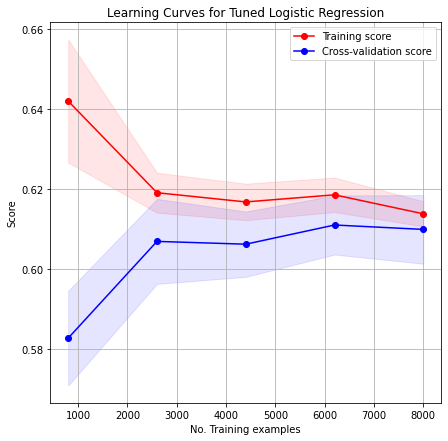

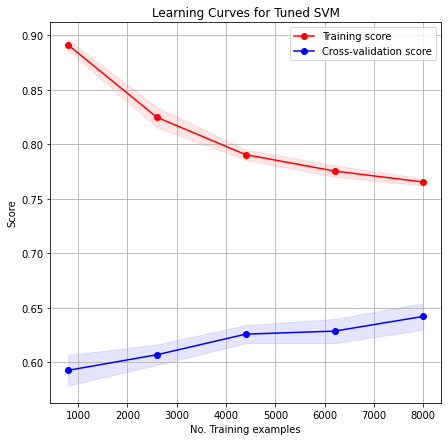

In [ ]:
# learning curves
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve #https://scikit-learn.org/stable/modules/learning_curve.html#learning-curve


def plot_learning_curve(estimator, name, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title('Learning Curves for ' + name)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("No. Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    #matplotlib.pyplot.fill_between. https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.fill_between.html
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


estimator = LogisticRegression(C=0.1, penalty='l1', max_iter=100, solver="liblinear")
plot_learning_curve(estimator, 'Tuned Logistic Regression', X_train, y_train)
plt.rcParams['figure.figsize'] = (7, 7)
plt.show()
estimator = SVC(C=100, gamma=0.01, kernel='rbf')
plot_learning_curve(estimator, 'Tuned SVM', X_train, y_train)
plt.rcParams['figure.figsize'] = (7, 7)
plt.show()

# From the graph, SVM validation score increases monotonically as trainining set data increases, so more examples do increases performances. Also, SVM has how variances across runs 
# compared to LR, which indicate robustness of the SVM.

# 10. Model Selection, Training on Entire Train set and Estimating on Test Set

In [ ]:
from time import time
from sklearn import metrics
# train and test classifiers


def train_and_test(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time) #decimal formatting

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    print("classification report:")
    print(metrics.classification_report(y_test, pred))
    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


results = []
model_tuple  = (
      (LogisticRegression(C=0.1, penalty='l1', max_iter=100, solver = "liblinear"), "Logistic Regressin"), 
      (Perceptron(alpha=0.001, max_iter=100), "Perceptron"), 
      (LinearDiscriminantAnalysis(tol=0.001), "LDA"), 
      (GaussianNB(), "Naive Bayes"), 
      (SVC(C=100, gamma=0.01, kernel='rbf'), "SVM")
    )
for classifier, name in model_tuple:
    print('=' * 80)
    print(name)
    results.append(train_and_test(classifier)) #list of set

    
indices = np.arange(len(results)) #not used
results = [[x[i] for x in results] for i in range(4)] #list of list

Logistic Regressin
________________________________________________________________________________
Training: 
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
train time: 0.258s
test time:  0.004s
accuracy:   0.617
classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.52      0.56      2315
         1.0       0.63      0.70      0.66      2685

    accuracy                           0.62      5000
   macro avg       0.61      0.61      0.61      5000
weighted avg       0.61      0.62      0.61      5000


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.001, max_iter=100)
train time: 0.020s
test time:  0.001s
accuracy:   0.566
classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.28      0.37      2315
         1.0       0.57      0.81      0.67      2685

    accuracy                          

# 7. Plotting ROC Curves on Trained Models on Test Set

No handles with labels found to put in legend.


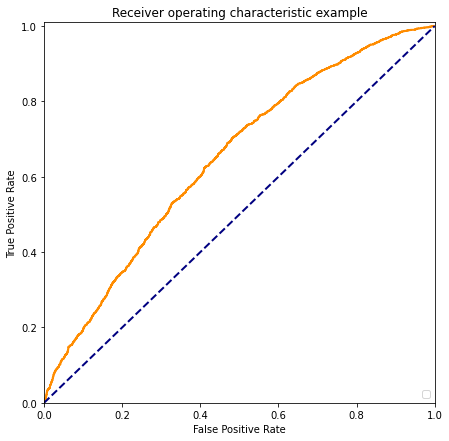

In [ ]:
from sklearn import metrics

lr = LogisticRegression(C=0.1, penalty='l1', max_iter=150, solver = "liblinear")
lr.fit(X_train, y_train)
lrpreds = lr.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lrpreds)
plt.figure()
lw = 2
plt.plot(lr_fpr, lr_tpr, color='darkorange',
         lw=lw) #lw is line width
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

## 8. Using Other Algorithms 

KNN: 0.592365 (0.014309)
CART: 0.603367 (0.012986)
Bag: 0.753413 (0.012356)
RF: 0.759027 (0.012604)
Bo: 0.602314 (0.012482)
ELE: 0.669734 (0.009072)


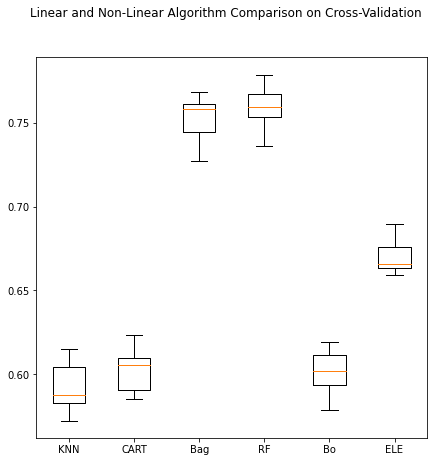

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.model_selection import KFold #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Bag', BaggingClassifier(DecisionTreeClassifier(),100, random_state=7)))
models.append(('RF', RandomForestClassifier(100, max_features=5)))
models.append(('Bo', AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=7)))
# create a voting estimation 
estimators = []
estimators.append(('logistic',LogisticRegression(solver = "liblinear")))
estimators.append(('NB',  GaussianNB()))
models.append(('ELE',VotingClassifier(estimators, voting='soft')))


# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
# replace with 'accuracy', 'neg_log_loss',.. based on the need
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure() 
fig.suptitle('Linear and Non-Linear Algorithm Comparison on Cross-Validation') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

In [72]:
results

[array([0.57252486, 0.61312075, 0.57647691, 0.58180036, 0.58558265,
        0.59603115, 0.58879822, 0.61534711, 0.60737511, 0.58659268]),
 array([0.58666795, 0.62047381, 0.6053879 , 0.58522535, 0.62326902,
        0.60390986, 0.60690036, 0.60565341, 0.58560362, 0.61058094]),
 array([0.74193568, 0.76736044, 0.74282234, 0.7488422 , 0.75805913,
        0.76063535, 0.76836552, 0.76084118, 0.72710223, 0.75816745]),
 array([0.7425982 , 0.77517495, 0.75218485, 0.76867204, 0.75863629,
        0.76173681, 0.7786023 , 0.76035962, 0.73630105, 0.75600861]),
 array([0.59587116, 0.61936633, 0.60654995, 0.57901276, 0.61846471,
        0.61171032, 0.59706416, 0.59298975, 0.59110566, 0.61100668]),
 array([0.66422876, 0.67556256, 0.67775155, 0.65940521, 0.67574438,
        0.6893819 , 0.66341798, 0.66385789, 0.6675586 , 0.66043313])]